In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
dataset=pd.read_csv("titanic.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
884,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
885,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.4500,NaN,S
886,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
dataset.shape

(888, 12)

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
le=preprocessing.LabelEncoder()

In [11]:
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset["Embarked"]=le.fit_transform(dataset["Embarked"])

In [12]:
from sklearn import neighbors

In [13]:
y=dataset["Pclass"]

In [14]:
X=dataset.drop(["Pclass","PassengerId","Name","Ticket","Cabin"],axis=1)

In [15]:
X.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## For k =1

In [17]:
Knn=neighbors.KNeighborsClassifier(n_neighbors=1)

In [18]:
Knn.fit(X_train,y_train).score(X_test,y_test)

0.8423423423423423

In [19]:
ypred=Knn.predict(X_test)

In [20]:
confusion_matrix(y_test,ypred)

array([[ 44,   8,   3],
       [  6,  35,   4],
       [  2,  12, 108]], dtype=int64)

## For all the k values i.e in range of 1-267

In [21]:
score=[]
for i in range(1,268):
    Knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train).score(X_test,y_test)
    score.append(accuracy_score(Knn.predict(X_test),y_test,normalize=True))

Matplotlib is building the font cache; this may take a moment.


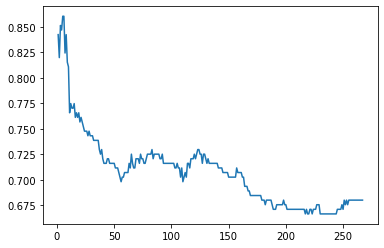

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,268),score)

### From the above graph we can give inference that if we keep k value equals to 1 then we get highest accuracy on test data that is around 90.1345%